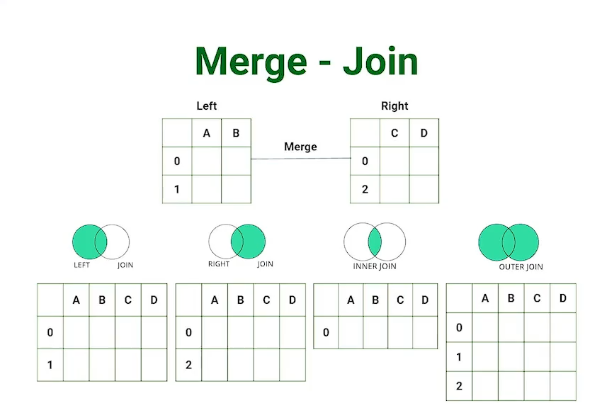

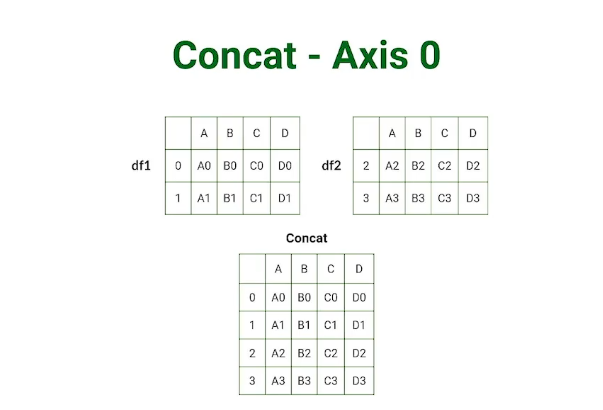

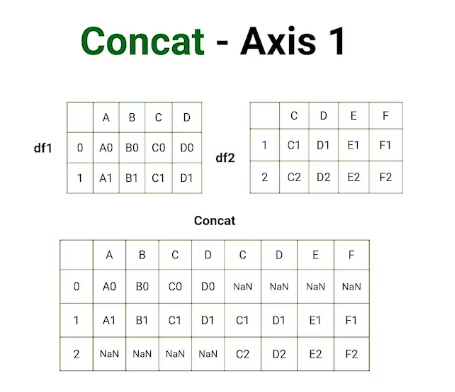

In [4]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3'],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']
})

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
 'B':['B4','B5','B6','B7'],
 'C':['C4','C5','C6','C7'],
 'D':['D4','D5','D6','D7']
})

In [5]:
pd.concat([df1,df2]) # tienen el mismo indice, por default el axis=0

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [6]:
pd.concat([df1,df2],ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [7]:
pd.concat([df1,df2],axis=1) #Ahora de manera horizontal

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


In [9]:
# Merge
izq = pd.DataFrame({
    'key':['k0','k1','k2','k3'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
}) # Izquierda

der = pd.DataFrame({
    'key':['k0','k1','k2','k3'],
    'C':['C0','C1','C2','C3'],
    'D':['D0','D1','D2','D3']
}) # Derecha

In [13]:
izq.merge(der,on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [14]:
# Merge
izq = pd.DataFrame({
    'key':['k0','k1','k2','k3'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
}) # Izquierda

der = pd.DataFrame({
    'key_2':['k0','k1','k2','k3'],
    'C':['C0','C1','C2','C3'],
    'D':['D0','D1','D2','D3']
}) # Derecha

In [18]:
izq.merge(der,left_on='key', right_on='key_2').drop(columns='key_2')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [19]:
# Merge
izq = pd.DataFrame({
    'key':['k0','k1','k2','k3'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
}) # Izquierda

der = pd.DataFrame({
    'key_2':['k0','k1','k2',np.nan],
    'C':['C0','C1','C2','C3'],
    'D':['D0','D1','D2','D3']
}) # Derecha

In [20]:
izq.merge(der,left_on='key', right_on='key_2') # El tercer key no hace match, asique no se incluye.Solo trae las coincidencias

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


In [23]:
izq.merge(der,left_on='key', right_on='key_2',how='right') #left,right,inner.

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,NaN,NaN,NaN,NaN,C3,D3


In [29]:
# Join. Index match
izq = pd.DataFrame(
    {'A':['A0','A1','A2'],
    'B':['B0','B1','B2']},index=(['k0','k1','k2']))

der = pd.DataFrame({'C':['C0','C1','C2'],
    'D':['D0','D1','D2']
             },index=(['k0','k2','k3']))

In [30]:
izq.join(der) #Join directamente desde los indices.

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [31]:
izq.join(der, how='inner') # inner/left/right/outer join

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1


In [32]:
izq.join(der, how='outer')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2
